<a href="https://colab.research.google.com/github/2303a52317/2303A52317/blob/main/Aiml_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [3]:
# Load the dataset
data = pd.read_csv('/content/Salary_Data.csv')

# View the first few rows of the dataset
print("Dataset head:\n", data.head())

# Summary of the dataset for quick insights
print("\nDataset summary:\n", data.describe())

# Check for missing values in each column
print("\nChecking for missing values:\n", data.isnull().sum())


Dataset head:
    YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

Dataset summary:
        YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

Checking for missing values:
 YearsExperience    0
Salary             0
dtype: int64


In [4]:
# Assuming the target variable is in the 'Salary' column
X = data.drop('Salary', axis=1)  # Change 'Target' to 'Salary'
y = data['Salary']              # Change 'Target' to 'Salary'

In [5]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on train, transform train
X_test = scaler.transform(X_test)        # Only transform test


In [7]:
# Define models in a dictionary
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine (SVM)": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [8]:
 #Initialize a list to store results
results = []

# Iterate over each model
for model_name, model in models.items():
    # Train model on training data
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Get probability predictions for ROC AUC (if supported)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    # Change 'binary' to 'weighted' for multiclass targets
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    error_rate = 1 - accuracy

    # For multiclass, ROC AUC might not be directly applicable. Consider other metrics.
    # If you have a specific way to handle multiclass ROC AUC, adapt accordingly.
    # For now, we'll skip calculating ROC AUC
    # roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    # Append metrics to results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Error Rate": error_rate,
        # "ROC AUC": roc_auc # Removing ROC AUC for now
    })

    # Print detailed classification report for each model
    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred))


Classification Report for Random Forest:
               precision    recall  f1-score   support

     54445.0       0.00      0.00      0.00       0.0
     57189.0       0.00      0.00      0.00       1.0
     63218.0       0.00      0.00      0.00       0.0
     64445.0       0.00      0.00      0.00       1.0
     66029.0       0.00      0.00      0.00       0.0
     67938.0       0.00      0.00      0.00       1.0
     83088.0       0.00      0.00      0.00       1.0
    101302.0       0.00      0.00      0.00       0.0
    112635.0       0.00      0.00      0.00       1.0
    113812.0       0.00      0.00      0.00       1.0
    116969.0       0.00      0.00      0.00       0.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0


Classification Report for Support Vector Machine (SVM):
               precision    recall  f1-score   support

     54445.0       0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [9]:
 #Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Display comparative results for all models
print("\nComparative Results:\n", results_df)



Comparative Results:
                           Model  Accuracy  Precision  Recall  F1-Score  \
0                 Random Forest       0.0        0.0     0.0       0.0   
1  Support Vector Machine (SVM)       0.0        0.0     0.0       0.0   
2     K-Nearest Neighbors (KNN)       0.0        0.0     0.0       0.0   
3                 Decision Tree       0.0        0.0     0.0       0.0   

   Error Rate  
0         1.0  
1         1.0  
2         1.0  
3         1.0  


Random Forest is likely a multi-class classifier, skipping ROC curve plotting.
Support Vector Machine (SVM) is likely a multi-class classifier, skipping ROC curve plotting.
K-Nearest Neighbors (KNN) is likely a multi-class classifier, skipping ROC curve plotting.
Decision Tree is likely a multi-class classifier, skipping ROC curve plotting.


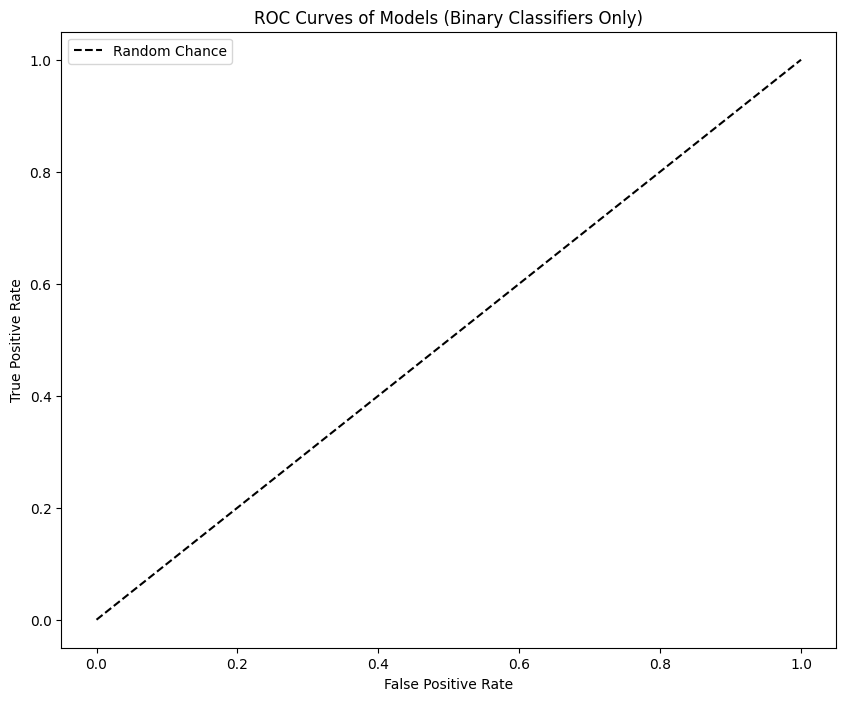

In [10]:
#Plot ROC Curves
plt.figure(figsize=(10, 8))

# Iterate over each model and plot ROC curves if available
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        try:
            # Attempt to plot ROC curve (will work for binary classifiers)
            RocCurveDisplay.from_estimator(model, X_test, y_test, name=model_name, ax=plt.gca())
        except ValueError:
            # Handle multi-class cases gracefully
            print(f"{model_name} is likely a multi-class classifier, skipping ROC curve plotting.")
            # Consider alternative metrics for multi-class problems (e.g., precision-recall curve)
    else:
        print(f"{model_name} does not support ROC AUC curve due to lack of probability prediction.")

# Random chance line (only applicable for binary classification)
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")

# Labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves of Models (Binary Classifiers Only)")
plt.legend()
plt.show()